In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model, Sequential, save_model, model_from_json, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import callbacks
import os

In [ ]:
print("Training set:")
for content in os.listdir("/content/drive/My Drive/pneumonia-detection1/train/"):
    print(str(len(os.listdir("/content/drive/My Drive/pneumonia-detection1/train/"+content))),content,"images.")

print("Validation set:")
for content in os.listdir("/content/drive/My Drive/pneumonia-detection1/validation/"):
    print(str(len(os.listdir("/content/drive/My Drive/pneumonia-detection1/validation/"+content))),content,"images.")

print("Test set:")
for content in os.listdir("/content/drive/My Drive/pneumonia-detection1/test/"):
    print(str(len(os.listdir("/content/drive/My Drive/pneumonia-detection1/test/"+content))),content,"images.")

Training set:
1199 Normal images.
2289 Bacterial Pneumonia images.
1196 Viral Pneumonia images.
Validation set:
251 Bacterial Pneumonia images.
150 Normal images.
151 Viral Pneumonia images.
Test set:
243 Bacterial Pneumonia images.
234 Normal images.
149 Viral Pneuomina images.


In [ ]:
data_generator = ImageDataGenerator(
                                    rescale=1./255,
                                    rotation_range=30,
                                  zoom_range=0.15,
                                  shear_range=0.15,
                                  horizontal_flip=True,
                                  fill_mode="nearest"
                                    )
data_generat = ImageDataGenerator(rescale=1./255)
train_gen = data_generat.flow_from_directory("/content/drive/My Drive/pneumonia-detection1/train",
                                               target_size=(256,256),
                                               color_mode='rgb',
                                               class_mode="categorical",
                                               batch_size=16,
                                               shuffle=True)

val_gen = data_generat.flow_from_directory("/content/drive/My Drive/pneumonia-detection1/validation",
                                               target_size=(256,256),
                                               color_mode='rgb',
                                               class_mode="categorical",
                                               batch_size=16,
                                               )

Found 4682 images belonging to 3 classes.
Found 550 images belonging to 3 classes.


In [ ]:
import tensorflow as tf

Model **1**

In [ ]:
# model.summary()

In [ ]:
# r = model.fit(train_gen,epochs=25,validation_data=val_gen)

In [ ]:
# model.save('/content/drive/My Drive/pneumonia-detection/')

Model **2**

In [ ]:
from tensorflow.keras.layers import Flatten
resnet = tf.keras.applications.resnet.ResNet101(input_shape=(256,256,3), weights='imagenet', include_top=False)
x = Flatten()(resnet.output)
x = Dense(512 ,activation='relu')(x)
x = Dense(64 ,activation='relu')(x)
prediction = Dense(3 ,activation='softmax')(x),
model = Model(inputs=resnet.input, outputs=prediction)

171450368/171446536 [==============================] - 2s 0us/step


In [ ]:
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
# model.summary()

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
  metrics=['accuracy']
)

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/drive/My Drive/pnuemonia-detection1/models/model{epoch:02d}.h5', save_weights_only=True, monitor='accuracy', verbose=1,
    save_best_only=False, mode='auto', period=5)

In [ ]:
class CustomSaver(callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    if epoch==0 or epoch==19 or epoch==39 or epoch==49 or epoch==59 or epoch==69 or epoch==79 or epoch==89 or epoch==99:
      self.model.save("/content/drive/My Drive/pneumonia-detection1/models/model_epoch_{}_loss_{:7.2f}.h5".format(epoch, logs['loss']))
      print("Epoch {} over. Saving model".format(epoch))

model_saver = CustomSaver()

In [ ]:
r = model.fit(
  train_gen,
  validation_data=val_gen,
  epochs=100,
  callbacks = [model_saver]
)

Epoch 1/100
293/293 [==============================] - 111s 380ms/step - loss: 0.4439 - accuracy: 0.8050 - val_loss: 0.4690 - val_accuracy: 0.8200
Epoch 2/100
293/293 [==============================] - 105s 358ms/step - loss: 0.4532 - accuracy: 0.8029 - val_loss: 0.4499 - val_accuracy: 0.8055
Epoch 3/100
293/293 [==============================] - 104s 356ms/step - loss: 0.4445 - accuracy: 0.8024 - val_loss: 0.4553 - val_accuracy: 0.8182
Epoch 4/100
293/293 [==============================] - 107s 365ms/step - loss: 0.4471 - accuracy: 0.8044 - val_loss: 0.4548 - val_accuracy: 0.8109
Epoch 5/100
293/293 [==============================] - 105s 357ms/step - loss: 0.4302 - accuracy: 0.8114 - val_loss: 0.4686 - val_accuracy: 0.8091
Epoch 6/100
293/293 [==============================] - 102s 348ms/step - loss: 0.4307 - accuracy: 0.8110 - val_loss: 0.5041 - val_accuracy: 0.7964
Epoch 7/100
293/293 [==============================] - 104s 353ms/step - loss: 0.4429 - accuracy: 0.7992 - val_loss: 0

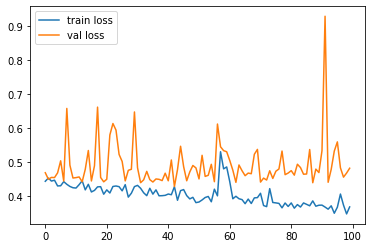

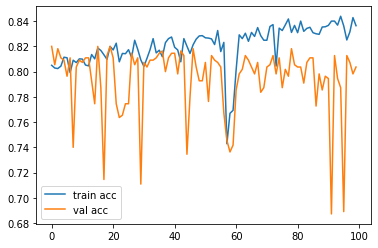

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
plot_model(model, to_file='/content/drive/My Drive/pneumonia-detection/models/model_resnet101.png', show_shapes=True, show_layer_names=True)
Image('model.png',width=400, height=200)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.869151 to fit



In [ ]:
model_50 = tf.keras.models.load_model('/content/drive/My Drive/pneumonia-detection1/models/model_epoch_49_loss_   0.38.h5')

In [ ]:
test_gen = data_generat.flow_from_directory("/content/drive/My Drive/pneumonia-detection1/test",
                                               target_size=(256,256),
                                               color_mode='rgb',
                                               class_mode="categorical",
                                               batch_size=32)

Found 624 images belonging to 3 classes.


In [ ]:
model_50.evaluate(test_gen)

20/20 [==============================] - 148s 7s/step - loss: 1.5092 - accuracy: 0.6811


[1.5091770887374878, 0.6810897588729858]

In [ ]:
model_40 = tf.keras.models.load_model('/content/drive/My Drive/pneumonia-detection1/models/model_epoch_39_loss_   0.40.h5')

In [ ]:
model_40.evaluate(test_gen) #74.86

20/20 [==============================] - 10s 517ms/step - loss: 1.4038 - accuracy: 0.6955


[1.403753638267517, 0.6955128312110901]

In [ ]:
model_40.evaluate(train_gen)

293/293 [==============================] - 84s 287ms/step - loss: 0.3729 - accuracy: 0.8313


[0.372862845659256, 0.8312686681747437]

In [ ]:
model_20 = tf.keras.models.load_model('/content/drive/My Drive/pneumonia-detection1/models/model_epoch_19_loss_   0.41.h5')

In [ ]:
model_20.evaluate(test)

20/20 [==============================] - 9s 462ms/step - loss: 2.0171 - accuracy: 0.6859


[2.017104387283325, 0.6858974099159241]

In [ ]:
model_70 = tf.keras.models.load_model('/content/drive/My Drive/pneumonia-detection1/models/model_epoch_69_loss_   0.40.h5')

In [ ]:
model_70.evaluate(test)

20/20 [==============================] - 9s 472ms/step - loss: 1.3797 - accuracy: 0.6651


[1.3797266483306885, 0.6650640964508057]

In [ ]:
model_100 = tf.keras.models.load_model('/content/drive/My Drive/pneumonia-detection1/models/model_epoch_99_loss_   0.37.h5')

In [ ]:
model_100.evaluate(test)

20/20 [==============================] - 9s 470ms/step - loss: 2.8223 - accuracy: 0.6330


[2.822261095046997, 0.6330128312110901]

In [ ]:
model_80 = tf.keras.models.load_model('/content/drive/My Drive/pneumonia-detection1/models/model_epoch_79_loss_   0.37.h5')

In [ ]:
model_80.evaluate(train_gen)

293/293 [==============================] - 1315s 4s/step - loss: 0.3405 - accuracy: 0.8460


[0.34047070145606995, 0.8460059762001038]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
Y_pred = model_40.predict(test_gen)
Y_pred = np.array(Y_pred)
Y_pred = Y_pred.reshape((624,3))
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_gen.classes, y_pred))
print('Classification Report')
target_names = ['Bacterial Pneumonia', 'Normal', 'Viral Pneumonia']
print(classification_report(test_gen.classes, y_pred, target_names=target_names))

Confusion Matrix
[[133  47  62]
 [136  41  57]
 [ 88  25  35]]
Classification Report
                     precision    recall  f1-score   support

Bacterial Pneumonia       0.37      0.55      0.44       242
             Normal       0.36      0.18      0.24       234
    Viral Pneumonia       0.23      0.24      0.23       148

           accuracy                           0.33       624
          macro avg       0.32      0.32      0.30       624
       weighted avg       0.33      0.33      0.32       624



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = np.zeros([624,])
y_test_full = np.zeros([624,])
for i in range(0, 20):
  (x_test, y_test) = test_gen[i]
  Y_pred = model_40.predict(x_test)
  y_test_full[32*i:32*i+32] = np.argmax(y_test, axis=1)
  y_pred[32*i:32*i+32] = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_full, y_pred)
print('Classification Report')
target_names = ['Bacterial Pneumonia', 'Normal', 'Viral Pneumonia']
print(classification_report(y_test_full, y_pred, target_names=target_names))

Confusion Matrix
Classification Report
                     precision    recall  f1-score   support

Bacterial Pneumonia       0.66      0.98      0.79       242
             Normal       0.95      0.46      0.62       234
    Viral Pneumonia       0.58      0.61      0.60       148

           accuracy                           0.70       624
          macro avg       0.73      0.68      0.67       624
       weighted avg       0.75      0.70      0.68       624



In [ ]:
our_with_40 = tf.keras.models.load_model('/content/drive/My Drive/pneumonia-detection1/our_model_with/model_epoch_39_loss_   0.43.h5')

In [ ]:
our_with_40.evaluate(test_gen)

20/20 [==============================] - 7s 371ms/step - loss: 0.7271 - accuracy: 0.8013


[0.7271037101745605, 0.8012820482254028]

In [ ]:
our_with_50 = tf.keras.models.load_model('/content/drive/My Drive/pneumonia-detection1/our_model_with/model_epoch_49_loss_   0.41.h5')

In [ ]:
our_with_50.evaluate(test_gen)

20/20 [==============================] - 8s 378ms/step - loss: 0.5686 - accuracy: 0.8413


[0.568550705909729, 0.8413461446762085]

In [ ]:
our_with_60 = tf.keras.models.load_model('/content/drive/My Drive/pneumonia-detection1/our_model_with/model_epoch_59_loss_   0.40.h5')

In [ ]:
our_with_60.evaluate(test_gen)

20/20 [==============================] - 8s 379ms/step - loss: 0.6976 - accuracy: 0.7901


[0.6976091265678406, 0.7900640964508057]

In [ ]:
our_with_70 = tf.keras.models.load_model('/content/drive/My Drive/pneumonia-detection1/our_model_with/model_epoch_69_loss_   0.38.h5')

In [ ]:
our_with_70.evaluate(test_gen)

20/20 [==============================] - 8s 389ms/step - loss: 0.6195 - accuracy: 0.8301


[0.6195243000984192, 0.8301281929016113]

In [ ]:
our_with_80 = tf.keras.models.load_model('/content/drive/My Drive/pneumonia-detection1/our_model_with/model_epoch_79_loss_   0.36.h5')

In [ ]:
our_with_80.evaluate(test_gen)

20/20 [==============================] - 8s 395ms/step - loss: 0.6482 - accuracy: 0.8269


[0.6481956243515015, 0.8269230723381042]

In [ ]:
our_without_50 = tf.keras.models.load_model('/content/drive/My Drive/pneumonia-detection1/our_model_without/model_epoch_49_loss_   0.01.h5')

In [ ]:
our_without_50.evaluate(test_gen)

20/20 [==============================] - 8s 378ms/step - loss: 3.2345 - accuracy: 0.6458


[3.234539270401001, 0.6458333134651184]

In [ ]:
our_without_40 = tf.keras.models.load_model('/content/drive/My Drive/pneumonia-detection1/our_model_without/model_epoch_39_loss_   0.02.h5')

In [ ]:
our_without_40.evaluate(test_gen)

20/20 [==============================] - 8s 390ms/step - loss: 2.8919 - accuracy: 0.6635


[2.891876697540283, 0.6634615659713745]

In [ ]:
our_without_60 = tf.keras.models.load_model('/content/drive/My Drive/pneumonia-detection1/our_model_without/model_epoch_59_loss_   0.01.h5')

In [ ]:
our_without_60.evaluate(test_gen)

20/20 [==============================] - 7s 362ms/step - loss: 3.9744 - accuracy: 0.6330


[3.9744293689727783, 0.6330128312110901]

In [ ]:
dense_with_50 = tf.keras.models.load_model('/content/drive/My Drive/pneumonia-detection1/dense_net_models/model_epoch_49_loss_   0.32.h5')

In [ ]:
dense_with_50.evaluate(test_gen)

20/20 [==============================] - 10s 502ms/step - loss: 0.5815 - accuracy: 0.8173


[0.581531286239624, 0.817307710647583]

In [ ]:
dense_with_40 = tf.keras.models.load_model('/content/drive/My Drive/pneumonia-detection1/dense_net_models/model_epoch_39_loss_   0.34.h5')

In [ ]:
dense_with_40.evaluate(test_gen)

20/20 [==============================] - 9s 445ms/step - loss: 0.8067 - accuracy: 0.8093


[0.8066987991333008, 0.8092948794364929]

In [ ]:
dense_with_20 = tf.keras.models.load_model('/content/drive/My Drive/pneumonia-detection1/dense_net_models/model_epoch_19_loss_   0.40.h5')

In [ ]:
dense_with_20.evaluate(test_gen)

20/20 [==============================] - 9s 440ms/step - loss: 0.5099 - accuracy: 0.8718


[0.5099469423294067, 0.8717948794364929]

In [ ]:
dense_without_20 = tf.keras.models.load_model('/content/drive/My Drive/pneumonia-detection1/dense_net_models_without/model_epoch_19_loss_   0.08.h5')

In [ ]:
dense_without_20.evaluate(test_gen)

20/20 [==============================] - 9s 450ms/step - loss: 3.5681 - accuracy: 0.6138


[3.5681464672088623, 0.6137820482254028]

In [ ]:
dense_without_40 = tf.keras.models.load_model('/content/drive/My Drive/pneumonia-detection1/dense_net_models_without/model_epoch_39_loss_   0.00.h5')

In [ ]:
dense_without_40.evaluate(test_gen)

20/20 [==============================] - 10s 508ms/step - loss: 3.6458 - accuracy: 0.7147


[3.645845413208008, 0.7147436141967773]

In [ ]:
dense_wthout_50 = tf.keras.models.load_model('/content/drive/My Drive/pneumonia-detection1/dense_net_models_without/model_epoch_49_loss_   0.00.h5')

In [ ]:
dense_wthout_50.evaluate(test_gen)

20/20 [==============================] - 9s 465ms/step - loss: 4.4578 - accuracy: 0.7131


[4.457840919494629, 0.7131410241127014]

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
from matplotlib import pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Resnet101 without augmentation',
                          cmap=plt.cm.Blues):
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.savefig('/content/drive/My Drive/pneumonia-detection1/resnet_without_40.png')
  plt.show()

Confusion matrix, without normalization
[[237   4   1]
 [ 64 107  63]
 [ 56   2  90]]


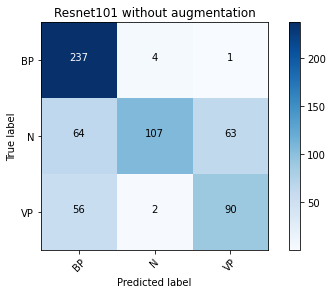

In [ ]:
plot_confusion_matrix(cm, ['BP','N','VP'])

In [ ]:
class_names = ['Normal','Bacterial Pneumonia','Viral Pneumonia']

In [ ]:
test_gen.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,